In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [20]:
train_vals = pd.read_csv('train_values.csv').drop(columns = 'patient_id')
train_labs = pd.read_csv('train_labels.csv').drop(columns = 'patient_id')
train_set = pd.read_csv('train_values.csv').drop(columns = 'patient_id')
train_set['heart_disease_present'] = train_labs['heart_disease_present']
test_values = pd.read_csv('test_values.csv')

train_vals.head()


,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [21]:
train_set.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


need to convert text data to quantitative data... how many unique elements are there?

In [22]:
train_set['thal'].unique()

array(['normal', 'reversible_defect', 'fixed_defect'], dtype=object)

In [23]:
def quantize_thal(thal_text):
    thal_elements = ['normal', 'reversible_defect', 'fixed_defect']
    return thal_elements.index(thal_text)

train_set['quant_thal'] = train_set['thal'].apply(quantize_thal)
train_vals['quant_thal'] = train_vals['thal'].apply(quantize_thal)
train_vals = train_vals.drop(columns = 'thal')

    

In [24]:
alpha = 0.5
bins = 40

#plt.figure(figsize = (11,7))
#train_set[train_set['quant_thal'] == 0]['quant_thal'].hist(alpha = alpha, bins = bins, label = 'normal', color = 'blue')
#train_set[train_set['quant_thal'] == 1]['quant_thal'].hist(alpha = alpha, bins = bins, label = 'reversible effect', color = 'yellow')
#train_set[train_set['quant_thal'] == 2]['quant_thal'].hist(alpha = alpha, bins = bins, label = 'fixed effect', color = 'red')

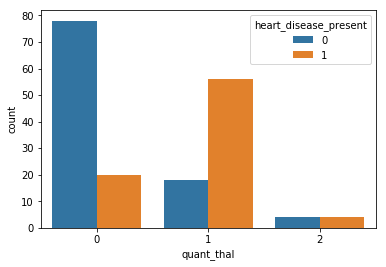

In [25]:
sns.countplot(x = 'quant_thal', hue = 'heart_disease_present', data = train_set)

# Standardizing the Data

In [37]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(train_vals)
scaled_train_vals = scaler.transform(train_vals)
scaled_train_vals = pd.DataFrame(scaled_train_vals, columns = train_vals.columns)

C:\Users\nateo\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\nateo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


# Spliting into train and test data

In [47]:
from sklearn.model_selection import train_test_split
test_size = 0.33

x_train, x_test, y_train, y_test = train_test_split(train_vals, train_labs, test_size = test_size, random_state = 42)
scaled_x_train, scaled_x_test, scaled_y_train, scaled_y_test = train_test_split(scaled_train_vals, train_labs, test_size = test_size, random_state = 42)


#  Logistic Regression Model

In [40]:
from sklearn.linear_model import LogisticRegression as LM

log_model = LM()
log_model.fit(x_train, y_train)

C:\Users\nateo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\nateo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [41]:
log_pred = log_model.predict(x_test)

In [42]:
from sklearn.metrics import classification_report,confusion_matrix, precision_score, log_loss

print(classification_report(log_pred, y_test))
print(log_loss(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.93      0.71      0.81        35
           1       0.70      0.92      0.79        25

   micro avg       0.80      0.80      0.80        60
   macro avg       0.81      0.82      0.80        60
weighted avg       0.83      0.80      0.80        60

6.907781932229811


# KNN Algorithm 

In [53]:
from sklearn.neighbors import KNeighborsClassifier
#n_neighboors = 40 gives precision = 1 for class 1
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(scaled_x_train, scaled_y_train)
knn_pred = knn.predict(scaled_x_test)
print(classification_report(y_test,knn_pred))
print(log_loss(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.70      0.96      0.81        27
           1       0.96      0.67      0.79        33

   micro avg       0.80      0.80      0.80        60
   macro avg       0.83      0.81      0.80        60
weighted avg       0.84      0.80      0.80        60

6.907768605605972


In [50]:
log_losses = []
rng = 120

scaled_y_train = np.asarray(scaled_y_train).ravel()


for i in range(1,rng):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_x_train, scaled_y_train)
    pred_i = knn.predict(scaled_x_test)
    log_losses.append(log_loss(y_test, pred_i))

best_value = log_losses.index(min(log_losses)) + 1
print(best_value)

3


Text(0, 0.5, 'Loss')

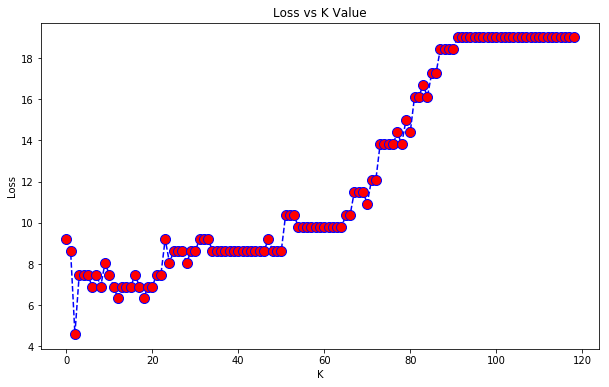

In [51]:
plt.figure(figsize = (10,6))
plt.plot(log_losses, color = 'blue', linestyle = 'dashed', marker = 'o', 
         markerfacecolor = 'red', markersize = 10)
plt.title('Loss vs K Value')
plt.xlabel('K')
plt.ylabel('Loss')

In [34]:
print(log_pred)

[0 0 1 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 1 1 0 1 1 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0]
